In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from numpy import nan as NaN


In [25]:
df_threshold = pd.read_csv('data/better_threshold.csv',sep=',')

In [26]:
print(len(df_threshold))
df_threshold.columns

30100


Index(['y', 'x', 'PP', 'TP', 'FP', 'PN', 'TN', 'FN', 'sensitivity',
       'specificity', 'precision', 'recall', 'accuracy', 'FPR', 'TPR', 'F1',
       'F2', 'F_half'],
      dtype='object')

In [27]:
df_threshold_BEP = DataFrame()
for i in np.arange(len(df_threshold)):
    a = df_threshold.iloc[i]
    if np.around(a['precision'],1) == np.around(a['recall'],1):
        df_threshold_BEP = df_threshold_BEP.append(a)
        
df_threshold_BEP[df_threshold_BEP['precision'] == df_threshold_BEP['precision'].max()]

,y,x,PP,TP,FP,PN,TN,FN,sensitivity,specificity,precision,recall,accuracy,FPR,TPR,F1,F2,F_half
15080,0.5,300.0,1129.0,770.0,359.0,2137.0,1725.0,412.0,0.651438,0.827735,0.682019,0.651438,0.763931,0.172265,0.651438,0.666378,0.657333,0.559593


(0.0, 1.0)

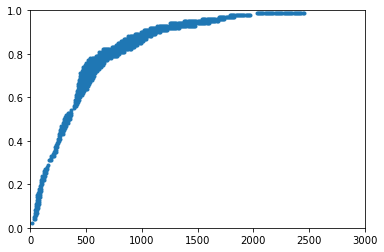

In [28]:
plt.plot(df_threshold_BEP['x'],df_threshold_BEP['y'],'.')
plt.xlim(0,3000)
plt.ylim(0,1)

In [32]:
df_threshold_BEP_good = df_threshold_BEP[df_threshold_BEP['precision']>0.68]
df_threshold_BEP_good

,y,x,PP,TP,FP,PN,TN,FN,sensitivity,specificity,precision,recall,accuracy,FPR,TPR,F1,F2,F_half
15080,0.50,300.0,1129.0,770.0,359.0,2137.0,1725.0,412.0,0.651438,0.827735,0.682019,0.651438,0.763931,0.172265,0.651438,0.666378,0.657333,0.559593
15684,0.52,320.0,1132.0,770.0,362.0,2134.0,1722.0,412.0,0.651438,0.826296,0.680212,0.651438,0.763013,0.173704,0.651438,0.665514,0.656997,0.558619


In [30]:
best = df_threshold[df_threshold['F1']==df_threshold['F1'].max()]
best

,y,x,PP,TP,FP,PN,TN,FN,sensitivity,specificity,precision,recall,accuracy,FPR,TPR,F1,F2,F_half
11164,0.37,270,1324,843,481,1942,1603,339,0.713198,0.769194,0.636707,0.713198,0.748928,0.230806,0.713198,0.672785,0.696464,0.550261


In [36]:
a = df_threshold[df_threshold['x']==100]
b = a[a['y']==0.30]
b

,y,x,PP,TP,FP,PN,TN,FN,sensitivity,specificity,precision,recall,accuracy,FPR,TPR,F1,F2,F_half
9040,0.3,100,939,644,295,2327,1789,538,0.544839,0.858445,0.685836,0.544839,0.744948,0.141555,0.544839,0.607261,0.568202,0.526144


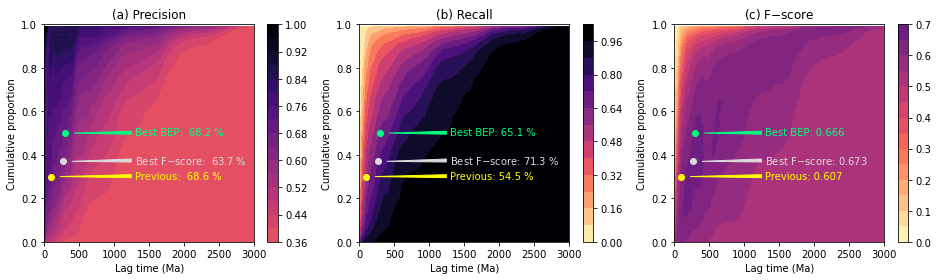

In [37]:
fig, ax = plt.subplots(1, 3, figsize = (16,4))
value1 = np.arange(0,1,0.01)
value2 = np.arange(0,3010,10)
titles = ('(a) Precision','(b) Recall','(c) F$-$score')
precision1 = '68.6 %'
precision2 = '63.7 %'
precision3 = '68.2 %'
recall1 = '54.5 %'
recall2 = '71.3 %'
recall3 = '65.1 %'
F11 = '0.607'
F12 = '0.673'
F13 = '0.666'

tests1 = ['Previous:  '+precision1, 'Previous: '+recall1, 'Previous: '+F11]
tests2 = ['Best F$-$score:  '+precision2, 'Best F$-$score: '+recall2, 'Best F$-$score: '+F12]
tests3 = ['Best BEP:  '+precision3, 'Best BEP: '+recall3, 'Best BEP: '+F13]
for i, key in enumerate(['precision','sensitivity','F1']):
    #cm = ax[i].contourf(value2, value1, np.reshape(np.array(df_threshold[key]), (len(value1), len(value2))), levels=20)
    cm = ax[i].contourf(value2, value1, np.reshape(np.array(df_threshold[key]), (len(value1), len(value2))), vmin=0, vmax=1, levels=15, cmap= plt.cm.magma_r)
    ax[i].set_xlim(0,3000)
    ax[i].set_ylim(0,1)
    ax[i].set_title(titles[i])
    plt.colorbar(cm, ax=ax[i])
    ax[i].scatter(x=100,y=0.30, zorder=2, color='yellow')
    ax[i].scatter(x=270,y=0.37, zorder=2, color='Gainsboro')
    ax[i].scatter(x=300,y=0.5, zorder=2, color='SpringGreen')
    ax[i].set_xlabel('Lag time (Ma)')
    ax[i].set_ylabel('Cumulative proportion')
    
    ax[i].annotate(tests1[i], color = 'yellow',
            xy=(200, 0.3),
            xytext=(1300, 0.28),
            arrowprops=dict(color = 'yellow', arrowstyle="wedge",
                            connectionstyle="arc3"),
                      horizontalalignment='left', verticalalignment='bottom')
    ax[i].annotate(tests2[i], color = 'Gainsboro',
        xy=(370, 0.37),
        xytext=(1300, 0.35),
        arrowprops=dict(color = 'Gainsboro', arrowstyle="wedge",
                        connectionstyle="arc3"),
                  horizontalalignment='left', verticalalignment='bottom')
    ax[i].annotate(tests3[i], color = 'SpringGreen',
        xy=(400, 0.5),
        xytext=(1300, 0.48),
        arrowprops=dict(color = 'SpringGreen', arrowstyle="wedge",
                        connectionstyle="arc3"),
                  horizontalalignment='left', verticalalignment='bottom')
    #ax[i].text(x=1300,y=0.21,s=tests1[i],color='yellow',horizontalalignment='left', verticalalignment='bottom')
    #ax[i].text(x=1300,y=0.42,s=tests3[i],color='SpringGreen',horizontalalignment='left', verticalalignment='bottom')
    
plt.savefig('plots/figures/Figure8.png', dpi=600)    
plt.savefig('plots/figures/Figure8.pdf')   

In [16]:
best = df_threshold[np.logical_and(df_threshold['F1'] >= 0.65 , df_threshold['precision'] >= 0.68 )]
best = best[best['recall']==best['recall'].max()]
best

,y,x,PP,TP,FP,PN,TN,FN,sensitivity,specificity,precision,recall,accuracy,FPR,TPR,F1,F2,F_half
15382,0.51,310,1137,774,363,2140,1727,413,0.652064,0.826316,0.680739,0.652064,0.763198,0.173684,0.652064,0.666093,0.657604,0.559087


In [11]:
roc1 = df_threshold[np.logical_and(df_threshold['x'] <= 100 , df_threshold['y'] <= 0.3 )]
roc2 = df_threshold[np.logical_and(df_threshold['x'] <= 310 , df_threshold['y'] <= 0.51 )]


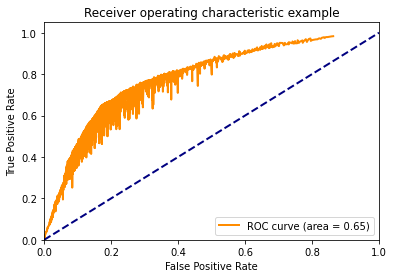

In [13]:
df_threshold_order_FPR = roc2.sort_values(by="FPR" , ascending=True)
df_threshold_order_FPR

from sklearn import metrics
auc = metrics.auc(df_threshold_order_FPR.FPR, df_threshold_order_FPR.TPR)

plt.figure()
lw = 2
plt.plot(df_threshold_order_FPR.FPR, df_threshold_order_FPR.TPR, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()